<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jesusrincon1328/blob/main/Inteligencia%20artificial%20y%20aprendizaje%20autom%C3%A1tico/MNA_IAyAA_semana_7_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [75]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import requests, zipfile
from io import BytesIO

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


from sklearn.model_selection import train_test_split, RepeatedKFold, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, PowerTransformer, power_transform, OneHotEncoder, LabelEncoder
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

#**Ejercicio-1.** 

En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las
mejores en el artículo antes citado: ‘Lifetime People who have liked a Page and engaged with a
post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables
que indican los autores en la Tabla 3 del artículo citado.

In [76]:
#Descarga del archivo Facebook Metrics
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip'
filename = url.split('/')
req = requests.get(url)
zipfile= zipfile.ZipFile(BytesIO(req.content))

In [77]:
#Extracción del conjunto de datos
zipfile.extractall('/content/Facebook_metrics')
df = pd.read_csv("/content/Facebook_metrics/dataset_Facebook.csv", sep=";")


#Renombrar la variable Lifetime People who have liked your Page and engaged with your post
df.rename(columns= {"Lifetime People who have liked your Page and engaged with your post":"LPE"}, inplace = True)
df

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [78]:
#cambiamos a valores numericos la coluna Type
#Link:0, Photo:1, Status:2, Video:3

le = LabelEncoder()
df["Type"]= le.fit_transform(df["Type"])

df.head()


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,1,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,1,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,1,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,1,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Page total likes                                              500 non-null    int64  
 1   Type                                                          500 non-null    int64  
 2   Category                                                      500 non-null    int64  
 3   Post Month                                                    500 non-null    int64  
 4   Post Weekday                                                  500 non-null    int64  
 5   Post Hour                                                     500 non-null    int64  
 6   Paid                                                          499 non-null    float64
 7   Lifetime Post Total Reach                                     500 non-n

In [80]:
df.isnull().sum()

Page total likes                                                0
Type                                                            0
Category                                                        0
Post Month                                                      0
Post Weekday                                                    0
Post Hour                                                       0
Paid                                                            1
Lifetime Post Total Reach                                       0
Lifetime Post Total Impressions                                 0
Lifetime Engaged Users                                          0
Lifetime Post Consumers                                         0
Lifetime Post Consumptions                                      0
Lifetime Post Impressions by people who have liked your Page    0
Lifetime Post reach by people who like your Page                0
LPE                                                             0
comment   

In [81]:
df["Paid"].fillna(df["Paid"].mode() [0], inplace=True)

In [82]:
df.isnull().sum()

Page total likes                                                0
Type                                                            0
Category                                                        0
Post Month                                                      0
Post Weekday                                                    0
Post Hour                                                       0
Paid                                                            0
Lifetime Post Total Reach                                       0
Lifetime Post Total Impressions                                 0
Lifetime Engaged Users                                          0
Lifetime Post Consumers                                         0
Lifetime Post Consumptions                                      0
Lifetime Post Impressions by people who have liked your Page    0
Lifetime Post reach by people who like your Page                0
LPE                                                             0
comment   

In [83]:
df.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page', 'LPE', 'comment',
       'like', 'share', 'Total Interactions'],
      dtype='object')

In [84]:
mydf = df[['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid','LPE']]

In [85]:
#Definir variables de Entrada y Variables de salida

X = mydf[['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid']] #varibales de entrada
y = mydf[['LPE']]


In [86]:
mydf.dtypes

Page total likes      int64
Type                  int64
Category              int64
Post Month            int64
Post Weekday          int64
Post Hour             int64
Paid                float64
LPE                   int64
dtype: object

In [87]:
#Paid cuenta con un valor nulo 
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page total likes  500 non-null    int64  
 1   Type              500 non-null    int64  
 2   Category          500 non-null    int64  
 3   Post Month        500 non-null    int64  
 4   Post Weekday      500 non-null    int64  
 5   Post Hour         500 non-null    int64  
 6   Paid              500 non-null    float64
 7   LPE               500 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 31.4 KB


In [88]:
mydf.isnull().sum()

Page total likes    0
Type                0
Category            0
Post Month          0
Post Weekday        0
Post Hour           0
Paid                0
LPE                 0
dtype: int64

#**Ejercicio-2.**
Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y
validación.

In [89]:
Xtv, X_test, ytv, y_test = train_test_split(X, y, train_size=0.8,shuffle=True, random_state=1)

print(Xtv.shape, ': dimensión de datos de entrada de entrenamiento y validación')
print(X_test.shape, ': dimensión de datos de entrada de prueba')  
print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(y_test.shape, ': dimensión de variable de salida para prueba')

(400, 7) : dimensión de datos de entrada de entrenamiento y validación
(100, 7) : dimensión de datos de entrada de prueba
(400, 1) : dimensión de variable de salida para entrenamiento y validación
(100, 1) : dimensión de variable de salida para prueba


In [90]:
Xtv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 238 to 37
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page total likes  400 non-null    int64  
 1   Type              400 non-null    int64  
 2   Category          400 non-null    int64  
 3   Post Month        400 non-null    int64  
 4   Post Weekday      400 non-null    int64  
 5   Post Hour         400 non-null    int64  
 6   Paid              400 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 25.0 KB


#**Ejercicio-3.**
Definirás tus propias funciones de errores para este problema de regresión. Los errores que utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el error porcentual absoluto medio MAPE.

In [91]:
# RMSE:
def mi_RMSE(ytrue, yhat):
  tmp = np.mean(np.square(ytrue - yhat), axis=0)
  return np.sqrt(tmp)

# MAE:
def mi_MAE(ytrue, yhat):
  tmp = np.mean(np.abs(ytrue - yhat), axis=0)
  return tmp

# MAPE:
def mi_MAPE(ytrue, yhat):
  epsilon = np.finfo(float).eps
  tmp = np.mean(np.abs(ytrue - yhat)/ (ytrue + epsilon), axis=0)
  return 100*tmp

#**Ejercicio-4.**
En la página de la UCI, así como en el artículo de los autores previamente citado encuentras
información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo
las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida.
Utiliza un Pipeline para evitar el filtrado de información.

In [92]:
# Variables numericas :  Page total likes, Post month, Post weekday, Post hour, Y-LPE
# Variables categoricas:  Category, Type, Paid

<Axes: >

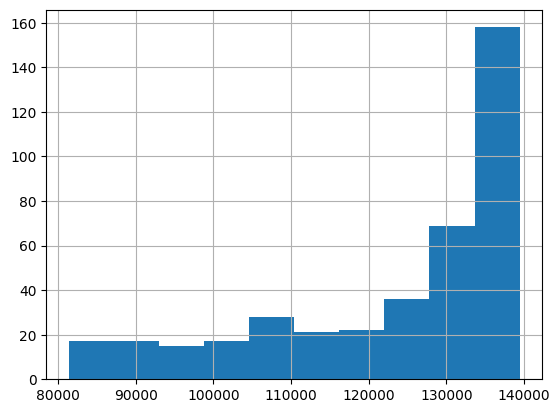

In [93]:
# Se utiliza Xtv y ytv para evitar el filtrado de información.

Xtv["Page total likes"].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb5962453f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb596244970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb596245630>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb596244c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb596244820>],
 'means': []}

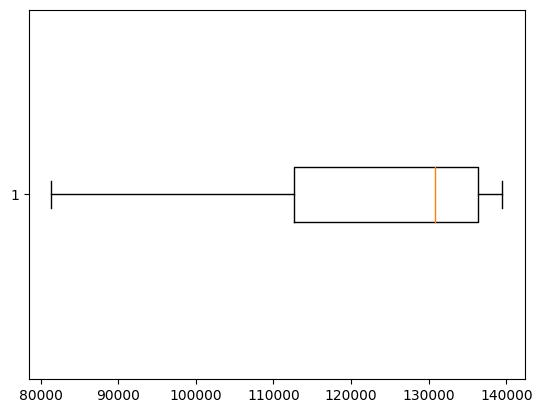

In [94]:
plt.boxplot(Xtv["Page total likes"], vert=False)

<Axes: >

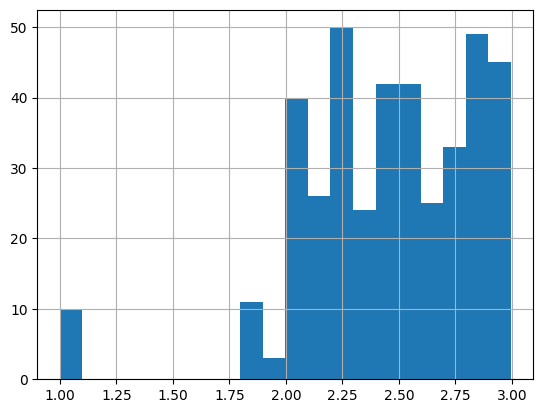

In [95]:
# Transformación de variable "Page total likes"

maximo = Xtv["Page total likes"].max()
np.power( maximo + 1 - Xtv["Page total likes"], .1).hist(bins=20)

<Axes: >

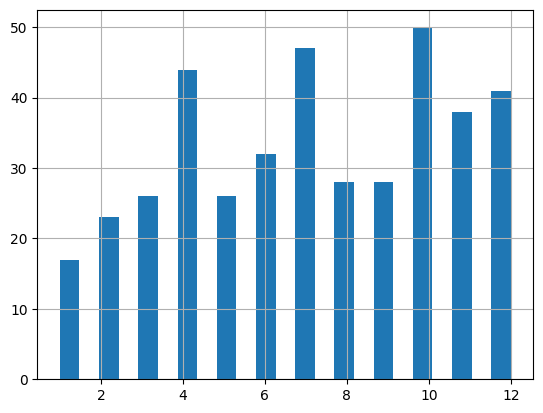

In [96]:
Xtv["Post Month"].hist(bins=23)

<Axes: >

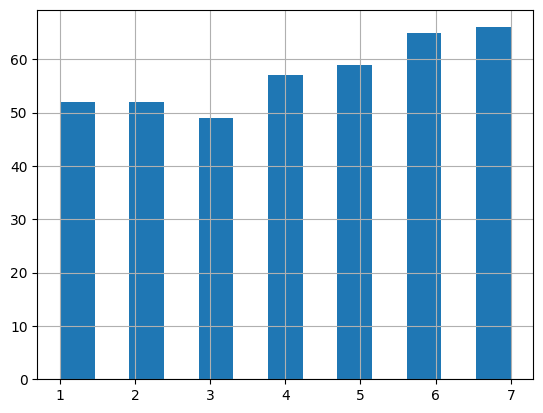

In [97]:
Xtv["Post Weekday"].hist(bins=13)

<Axes: >

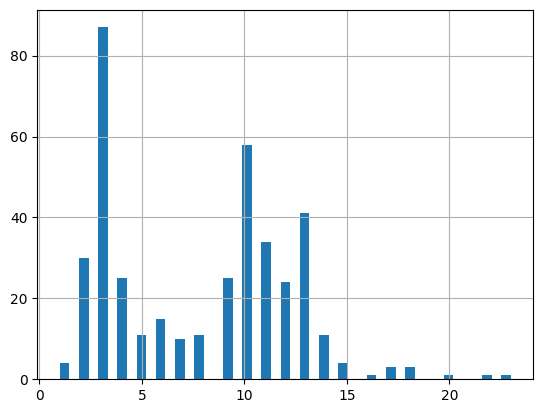

In [98]:
Xtv["Post Hour"].hist(bins=47)

<Axes: >

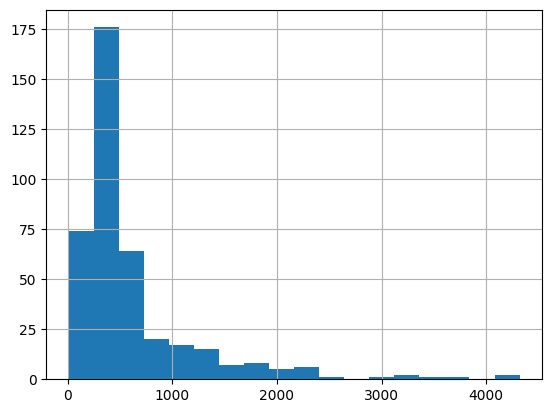

In [99]:
ytv["LPE"].hist(bins=18)

<Axes: >

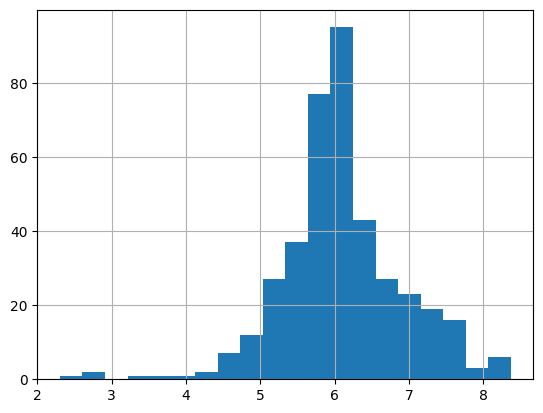

In [100]:
#Se realiza transfornmación de Logaritmo natural
np.log( 1 + ytv["LPE"]).hist(bins=20)

In [101]:
#Analisis de las variables categoricas ,  cada nivel debera de tener al menos un 5%

Xtv["Category"].value_counts()

1    171
3    124
2    105
Name: Category, dtype: int64

In [102]:
Xtv["Category"].value_counts() / Xtv.shape[0]

1    0.4275
3    0.3100
2    0.2625
Name: Category, dtype: float64

In [103]:
Xtv["Paid"].value_counts()

0.0    288
1.0    112
Name: Paid, dtype: int64

In [104]:
Xtv["Paid"].value_counts() / Xtv.shape[0]

0.0    0.72
1.0    0.28
Name: Paid, dtype: float64

In [105]:
Xtv["Type"].value_counts()

1    341
2     38
0     16
3      5
Name: Type, dtype: int64

In [106]:
Xtv["Type"].value_counts() / Xtv.shape[0]

1    0.8525
2    0.0950
0    0.0400
3    0.0125
Name: Type, dtype: float64

In [ ]:
#Definir las funciones para las transformaciones 

In [107]:
def mi_power(X):
  M = np.max(X)
  tmp = np.power( M + 1 - X, .1)
  return tmp

def mi_log(y):
  tmp = np.log(1 + y)
  return tmp

def mi_invlog(y):
  tmp = np.exp(y) -1
  return tmp

def mi_type(X):
  X["Type"] = X["Type"].map({1:1, 2:2, 0:4, 3:4})
  return X


In [108]:
# Datos perdidos de variables numéricas:
numImp_pipe = Pipeline(steps = [("numImp", SimpleImputer(strategy="median"))])
numImp_pipe_nombres = ["Page total likes", "Post Month", "Post Weekday", "Post Hour"]


#**Ejercicio-5.**

In [ ]:
None

#**Ejercicio-6.**

In [ ]:
None

#**Ejercicio-7.**

In [ ]:
None

#**Ejercicio-8.**

In [ ]:
None

#**Ejercicio-9.**

In [ ]:
None

#**Ejercicio-10.**

In [ ]:
None

#**Ejercicio-11.**

In [ ]:
None

#**Ejercicio-12.**

In [ ]:
None

###**Fin de la Actividad de la semana 7.**